In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import scipy.io as sio
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [5]:
def load_and_process_data(file_paths, keys):
    dataframes = []
    
    # Iterate over each file path
    for file_path in file_paths:
        data = sio.loadmat(file_path)
        
        # Collect data for specified keys
        for key in keys:
            try:
                # Check if key exists in the MATLAB file
                if key in data:
                    df = pd.DataFrame(data[key])
                    df['data_key'] = key  # Add a column for the data source key
                    dataframes.append(df)
                    print(f"Successfully created dataframe for key: {key} in file: {file_path}")
                else:
                    print(f"Key {key} not found in file: {file_path}")
            except Exception as e:
                print(f"Error processing key {key} in file: {file_path}: {str(e)}")
    
    # Check if any DataFrames were created
    if dataframes:
        # Concatenate all DataFrames into one
        consolidated_dataframe = pd.concat(dataframes, ignore_index=True)

        # One-hot encode the 'data_key' column
        encoder = OneHotEncoder(sparse=False)
        encoded_data = encoder.fit_transform(consolidated_dataframe[['data_key']])
        new_columns = encoder.get_feature_names_out(['data_key'])  # Get column names for encoded features
        
        # Add the one-hot encoded columns back to the consolidated DataFrame
        df_consolidated = pd.concat([consolidated_dataframe.drop(['data_key'], axis=1), pd.DataFrame(encoded_data, columns=new_columns)], axis=1)

        return df_consolidated
    else:
        print("No DataFrames were created. Check the keys and file paths.")
        return pd.DataFrame()  # Return an empty DataFrame if no data was loaded


In [6]:
# Define file paths and keys
file_paths = [r"C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut", r"C:\pyDocs\gitRepos\STNN\Data04-08_TF_PrimVag_Cut"]
keys = ['Baseline', 'CincoP', 'DezP', 'VinteP', 'RotDamage10e7', 'RotDamage10e9']

# Load and process the data
consolidated_dataframe = load_and_process_data(file_paths, keys)

Successfully created dataframe for key: Baseline in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Key CincoP not found in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Key DezP not found in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Key VinteP not found in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Successfully created dataframe for key: RotDamage10e7 in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Successfully created dataframe for key: RotDamage10e9 in file: C:\pyDocs\gitRepos\STNN\Data20-03_TF_PrimVag_Cut
Successfully created dataframe for key: Baseline in file: C:\pyDocs\gitRepos\STNN\Data04-08_TF_PrimVag_Cut
Successfully created dataframe for key: CincoP in file: C:\pyDocs\gitRepos\STNN\Data04-08_TF_PrimVag_Cut
Successfully created dataframe for key: DezP in file: C:\pyDocs\gitRepos\STNN\Data04-08_TF_PrimVag_Cut
Successfully created dataframe for key: VinteP in file: C:\pyDocs\gitRepos\STNN\Data04-08_TF_PrimVag_Cut
Key RotDamage1

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
consolidated_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,5826,5827,5828,5829,data_key_Baseline,data_key_CincoP,data_key_DezP,data_key_RotDamage10e7,data_key_RotDamage10e9,data_key_VinteP
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,-0.055720,-0.056665,-0.057715,-0.058724,-0.059546,-0.060264,-0.061120,-0.062173,-0.063270,-0.064281,...,0.055327,0.052036,0.048464,0.044680,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857
std,0.009015,0.009127,0.009241,0.009291,0.009332,0.009466,0.009715,0.009886,0.009899,0.009926,...,0.024371,0.024979,0.025487,0.025940,0.451786,0.349952,0.349952,0.349952,0.349952,0.349952
min,-0.099707,-0.100887,-0.111098,-0.102723,-0.102749,-0.102323,-0.101723,-0.107079,-0.108863,-0.107388,...,-0.016515,-0.018844,-0.021152,-0.022786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.060875,-0.061747,-0.062653,-0.063896,-0.064846,-0.065618,-0.066728,-0.068035,-0.069141,-0.070076,...,0.043688,0.039398,0.034778,0.030568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.054620,-0.055376,-0.056337,-0.057138,-0.057935,-0.058729,-0.059458,-0.060368,-0.061465,-0.062521,...,0.057711,0.055011,0.051528,0.047416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.049230,-0.050147,-0.051027,-0.052001,-0.052905,-0.053490,-0.054089,-0.055047,-0.056160,-0.057191,...,0.070068,0.067397,0.064965,0.061952,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-0.034840,-0.034209,-0.035744,-0.037138,-0.038758,-0.038627,-0.037510,-0.039438,-0.039721,-0.042341,...,0.161762,0.159396,0.147409,0.140761,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# rename with generic labels
label_dict = {'data_key_Baseline': 'y_0',
                 'data_key_CincoP': 'y_1',  
                 'data_key_DezP': 'y_2',
                   'data_key_VinteP' : 'y_3',
                   'data_key_RotDamage10e7' : 'y_4',
                   'data_key_RotDamage10e9' : 'y_5'
                 }

In [9]:
dados = consolidated_dataframe
dados = dados.rename(columns=label_dict)

In [10]:
# Selecting only the columns 'y_0' to 'y_5' and summing their values
selected_columns = [f'y_{i}' for i in range(6)]  # Create a list of the column names from 'y_0' to 'y_5'
counts = dados[selected_columns].sum()  # Sum only the selected columns

print(counts)

y_0    2000.0
y_1    1000.0
y_2    1000.0
y_3    1000.0
y_4    1000.0
y_5    1000.0
dtype: float64


In [11]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,5826,5827,5828,5829,y_0,y_1,y_2,y_4,y_5,y_3
0,-0.052336,-0.053302,-0.054380,-0.055752,-0.057125,-0.056876,-0.056326,-0.056441,-0.057509,-0.058578,...,0.075084,0.071741,0.070549,0.069827,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.056454,-0.059195,-0.061341,-0.059409,-0.057477,-0.057875,-0.059024,-0.059594,-0.059241,-0.058919,...,0.064591,0.061219,0.059060,0.058326,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.069127,-0.069779,-0.074695,-0.081096,-0.081438,-0.080602,-0.085480,-0.090614,-0.090466,-0.090309,...,0.014161,0.009209,0.003274,-0.000921,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.051658,-0.050879,-0.053792,-0.057792,-0.060296,-0.059956,-0.059617,-0.061490,-0.063564,-0.064028,...,0.069917,0.068196,0.066475,0.065870,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.054002,-0.054574,-0.054325,-0.053333,-0.052648,-0.052943,-0.053239,-0.053108,-0.052955,-0.054581,...,0.066767,0.061402,0.058524,0.055646,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Separate the data based on the classes
y_0_data = dados[dados['y_0'] == 1]
y_1_data = dados[dados['y_1'] == 1]
y_2_data = dados[dados['y_2'] == 1]
y_3_data = dados[dados['y_3'] == 1]
y_4_data = dados[dados['y_4'] == 1]
y_5_data = dados[dados['y_5'] == 1]

# Shuffle the instances within each class
y_0_data = y_0_data.sample(frac=1, random_state=42)
y_1_data = y_1_data.sample(frac=1, random_state=42)
y_2_data = y_2_data.sample(frac=1, random_state=42)
y_3_data = y_3_data.sample(frac=1, random_state=42)
y_4_data = y_4_data.sample(frac=1, random_state=42)
y_5_data = y_5_data.sample(frac=1, random_state=42)

# Select 100 instances of each class for the testing dataset
y_0_test = y_0_data.iloc[:100]
y_1_test = y_1_data.iloc[:100]
y_2_test = y_2_data.iloc[:100]
y_3_test = y_3_data.iloc[:100]
y_4_test = y_4_data.iloc[:100]
y_5_test = y_5_data.iloc[:100]

# Concatenate the testing data from all classes
test_data = pd.concat([y_0_test, y_1_test, y_2_test, y_3_test, y_4_test, y_5_test])

# Remove the one hot encoding columns to get the testing features and labels
X_test = test_data.drop(['y_0', 'y_1', 'y_2', 'y_3','y_4', 'y_5'], axis=1)
y_test = test_data[['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5']]

In [13]:
from sklearn.model_selection import train_test_split
# Now, use the remaining data for training and validation
remaining_data = dados.drop(test_data.index)

# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    remaining_data.drop(['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5'], axis=1),
    remaining_data[['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5']],
    test_size=0.2,  # You can adjust the validation set size as needed
    random_state=42
)

In [14]:
print(y_train)

      y_0  y_1  y_2  y_3  y_4  y_5
2006  0.0  0.0  0.0  0.0  0.0  1.0
3509  1.0  0.0  0.0  0.0  0.0  0.0
5646  0.0  0.0  1.0  0.0  0.0  0.0
2882  0.0  0.0  0.0  0.0  0.0  1.0
6194  0.0  0.0  0.0  1.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...
4083  0.0  1.0  0.0  0.0  0.0  0.0
5659  0.0  0.0  1.0  0.0  0.0  0.0
5700  0.0  0.0  1.0  0.0  0.0  0.0
5878  0.0  0.0  1.0  0.0  0.0  0.0
900   1.0  0.0  0.0  0.0  0.0  0.0

[5120 rows x 6 columns]


In [15]:
import tensorflow as tf

num_spatial_features = 5830
num_classes = 6

def spatial_transformer_model(input_shape, num_spatial_features, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Localization network to predict transformation parameters
    loc_net = tf.keras.layers.Dense(num_spatial_features * 2, activation='relu')(inputs)
    
    # Reshape loc_net output to spatial transformation parameters
    theta = tf.keras.layers.Reshape((num_spatial_features, 2))(loc_net)
    
    # Generate grid transformation for 1D input
    def apply_transformation(x):
        x_input, theta_input = x
        x_input = tf.expand_dims(x_input, axis=-1)  # Add channel dimension for compatibility
        
        # Transpose theta_input before matrix multiplication
        
        transformed = tf.matmul(tf.transpose(theta_input, perm=[0, 2, 1]), x_input)
        
        return tf.squeeze(transformed, axis=-1)  # Remove added dimension
    
    transformed_input = tf.keras.layers.Lambda(apply_transformation)([inputs, theta])

    # Spatial Transformer Encoder
    spatial_encoder = tf.keras.layers.Dense(512, activation='relu')(transformed_input)
    spatial_encoder = tf.keras.layers.Dense(256, activation='relu')(spatial_encoder)
    
    # Output layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(spatial_encoder)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define the input shape and number of spatial features
input_shape = (5830)

# Create an instance of the Spatial Transformer model
model = spatial_transformer_model(input_shape, num_spatial_features, num_classes)

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
160/160 [==============================] - 127s 789ms/step - loss: 1.8333 - accuracy: 0.3598 - val_loss: 1.3476 - val_accuracy: 0.4477
Epoch 2/100
160/160 [==============================] - 127s 795ms/step - loss: 1.3237 - accuracy: 0.4402 - val_loss: 1.1814 - val_accuracy: 0.5547
Epoch 3/100
160/160 [==============================] - 124s 774ms/step - loss: 1.1909 - accuracy: 0.5078 - val_loss: 0.9641 - val_accuracy: 0.6109
Epoch 4/100
160/160 [==============================] - 123s 766ms/step - loss: 1.0242 - accuracy: 0.5732 - val_loss: 0.9665 - val_accuracy: 0.5547
Epoch 5/100
160/160 [==============================] - 123s 766ms/step - loss: 0.9121 - accuracy: 0.6178 - val_loss: 0.8073 - val_accuracy: 0.6461
Epoch 6/100
160/160 [==============================] - 123s 768ms/step - loss: 0.7753 - accuracy: 0.6674 - val_loss: 0.6159 - val_accuracy: 0.7414
Epoch 7/100
160/160 [==============================] - 123s 770ms/step - loss: 0.7827 - accuracy: 0.6725 - val_loss: 0

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = model.predict(X_test)

19/19 [==============================] - 1s 68ms/step


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained and obtained predictions
y_test_pred = model.predict(X_test)

19/19 [==============================] - 1s 67ms/step


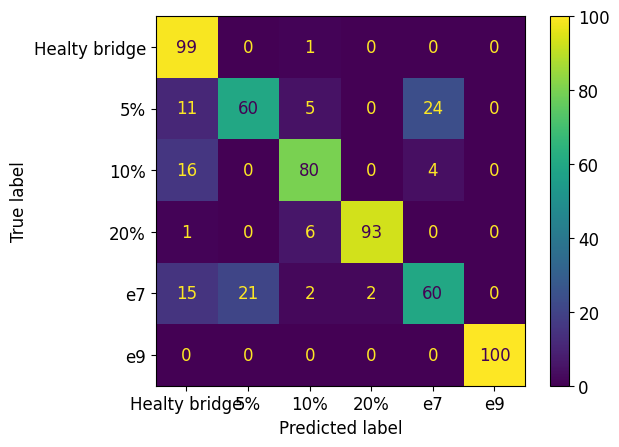

In [18]:
import matplotlib.pyplot as plt

# Convert predictions to class labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Convert ground truth labels to class labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healty bridge', '5%', '10%', '20%', 'e7', 'e9'])

# Set the font size for the plot
plt.rcParams['font.size'] = 12

# Plot the confusion matrix
cm_display.plot()
plt.savefig('confusion_matrix.png')
# Show the plot
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_true_labels, y_test_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8200


In [20]:
import tensorflow as tf

num_classes = 6

def single_layer_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Flatten the input
    flattened = tf.keras.layers.Flatten()(inputs)
    
    # Single Dense layer
    dense = tf.keras.layers.Dense(512, activation='relu')(flattened)
    
    # Output layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dense)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define the input shape
input_shape = (5830,)

# Create an instance of the single-layer model
single_layer_model = single_layer_model(input_shape, num_classes)

# Compile the model
single_layer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_single = single_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = single_layer_model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")

Epoch 1/100
160/160 [==============================] - 6s 34ms/step - loss: 1.5741 - accuracy: 0.3850 - val_loss: 1.3782 - val_accuracy: 0.4000
Epoch 2/100
160/160 [==============================] - 5s 32ms/step - loss: 1.3361 - accuracy: 0.4533 - val_loss: 1.3381 - val_accuracy: 0.4516
Epoch 3/100
160/160 [==============================] - 5s 32ms/step - loss: 1.2722 - accuracy: 0.4891 - val_loss: 1.1977 - val_accuracy: 0.5297
Epoch 4/100
160/160 [==============================] - 5s 32ms/step - loss: 1.1903 - accuracy: 0.5197 - val_loss: 1.1640 - val_accuracy: 0.4781
Epoch 5/100
160/160 [==============================] - 5s 32ms/step - loss: 1.1091 - accuracy: 0.5387 - val_loss: 1.0556 - val_accuracy: 0.6789
Epoch 6/100
160/160 [==============================] - 5s 32ms/step - loss: 1.0329 - accuracy: 0.5805 - val_loss: 0.9829 - val_accuracy: 0.5609
Epoch 7/100
160/160 [==============================] - 5s 32ms/step - loss: 0.9806 - accuracy: 0.5873 - val_loss: 0.9877 - val_accuracy:

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = single_layer_model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


19/19 [==============================] - 0s 3ms/step


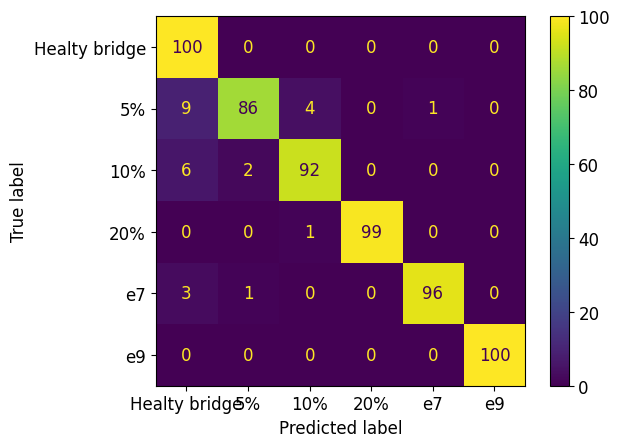

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained and obtained predictions
y_test_pred = single_layer_model.predict(X_test)

# Convert predictions to class labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Convert ground truth labels to class labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healty bridge', '5%', '10%', '20%', 'e7', 'e9'])

# Set the font size for the plot
plt.rcParams['font.size'] = 12

# Plot the confusion matrix
cm_display.plot()
plt.savefig('confusion_matrix.png')
# Show the plot
plt.savefig('cm_slnn')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_true_labels, y_test_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9550
